## Simulating pattern formation by vascular mesenchymal cells

In [648]:
# Imports
import numpy as np
import matplotlib.pyplot as pp
from IPython.core.pylabtools import figsize
import warnings
warnings.filterwarnings('ignore')

**Parameter initializations**. We do this first in order to have them available for the function definitions.

In [645]:
# Setting model parameters
Du = 0.01
Dv = 2.0
c = 0.01
e = 0.02
S = 0.05
k = 0.65
gamma = 15000

In [683]:
# Setting simulation parameters
size = 200
dx = 2./size
dt = .00001

In [647]:
Z = np.random.rand(2,size,size)*0.02

### Function definitions.

First, we're implementing a number of essential **numerical methods**.

In [672]:
def laplacian(Z,dx):
    top = Z[0:-2,1:-1]
    left = Z[1:-1,0:-2]
    bottom = Z[2:,1:-1]
    right = Z[1:-1,2:]
    center = Z[1:-1,1:-1]
    return (top+left+bottom+right-4*center)/dx**2

def neumann(Z):
    Y = np.copy(Z)
    Y[:,0,:] = Y[:,1,:]
    Y[:,-1,:] = Y[:,-2,:]
    Y[:,:,0] = Y[:,:,1]
    Y[:,:,-1] = Y[:,:,-2]
    return Y

def rk2(eqns,Z,dx,dt):
    Z1 = eqns(Z,dx,dt)
    Z2 = eqns(Z+Z1*(dt/2.),dx,dt)
    return Z+dt*Z2

Next, we set up the **differential equation systems** we want to simulate.

In [667]:
def garfinkel_bostrom_2004_2D(Z, dx, dt):
    U = Z[0,1:-1, 1:-1]
    V = Z[1,1:-1, 1:-1]
    Y = np.empty(Z.shape)
    Y[:,1:-1,1:-1] = np.array([
        (Du/Dv) * laplacian(Z[0,:,:],dx) + gamma * (U**2/(np.ones(U.shape)+k*U**2)/V - c*U),
        laplacian(Z[1,:,:],dx) + gamma * (U**2 - e*V + np.full(V.shape,S))
    ])
    return neumann(Y)

Lastly, some code to visualize the results and a function to automate **running a simulation and plotting** it.

In [678]:
def show_patterns(U,ax,title=None):
    ax.imshow(U, cmap=pp.cm.bone_r,
              interpolation='none',
              extent=[-1, 1, -1, 1])
    ax.set_axis_off()
    if title:
        ax.set_title(title)

In [679]:
def run_simulation(n=1000,cont=False,ax=None,dim=0,dx=dx,dt=dt,title=None):
    global Z
    if not cont:
        # Reset to initial conditions
        Z = np.random.rand(*Z.shape)*0.02
    # Simulation for n timesteps
    for i in range(n):
        Z = rk2(garfinkel_bostrom_2004,Z,dx,dt)
    if ax:
        show_patterns(Z[dim,:,:],ax,title)
    else:
        pp.close("all")
        fig,ax = pp.subplots(1,1)
        show_patterns(Z[dim,:,:],ax,title)
        return fig

## Simulations

A first **comparison of different values for the external inhibition S** and attempt to observe the transition from stripes to spots described in the paper.

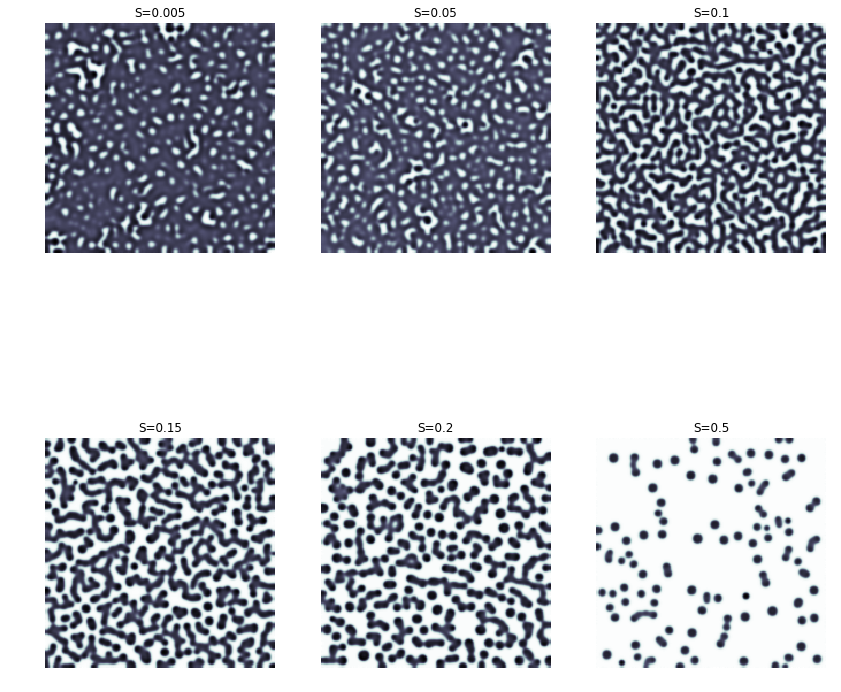

In [684]:
# Setting model parameters
gamma = 15000
pp.close('all')
fig,axs = pp.subplots(2,3)
for ax,b in zip([n for m in axs for n in m],[0.005,0.05,0.1,0.15,0.2,0.5]):
    S = b
    run_simulation(n=10000,ax=ax,title="S="+str(S))
fig

Comparing **small values of S** at shorter reactions times.

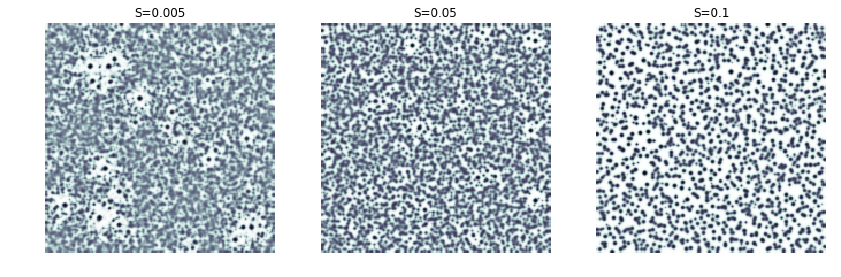

In [682]:
# Setting model parameters
gamma = 15000
pp.close('all')
fig,axs = pp.subplots(1,3)
for ax,b in zip([m for m in axs],[0.005,0.05,0.1]):
    S = b
    run_simulation(n=2000,ax=ax,title="S="+str(S))
fig

Comparing some higher values of S at longer reaction times.

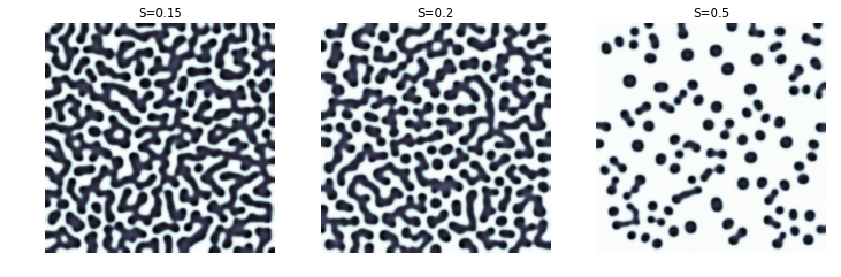

In [681]:
# Setting model parameters
gamma = 15000
pp.close('all')
fig,axs = pp.subplots(1,3)
for ax,b in zip([m for m in axs],[0.15,0.2,0.5]):
    S = b
    run_simulation(n=20000,ax=ax,title="S="+str(S))
fig

First, a look at the initial stages for S=0.05 simulated in 9 steps of 250 iterations.

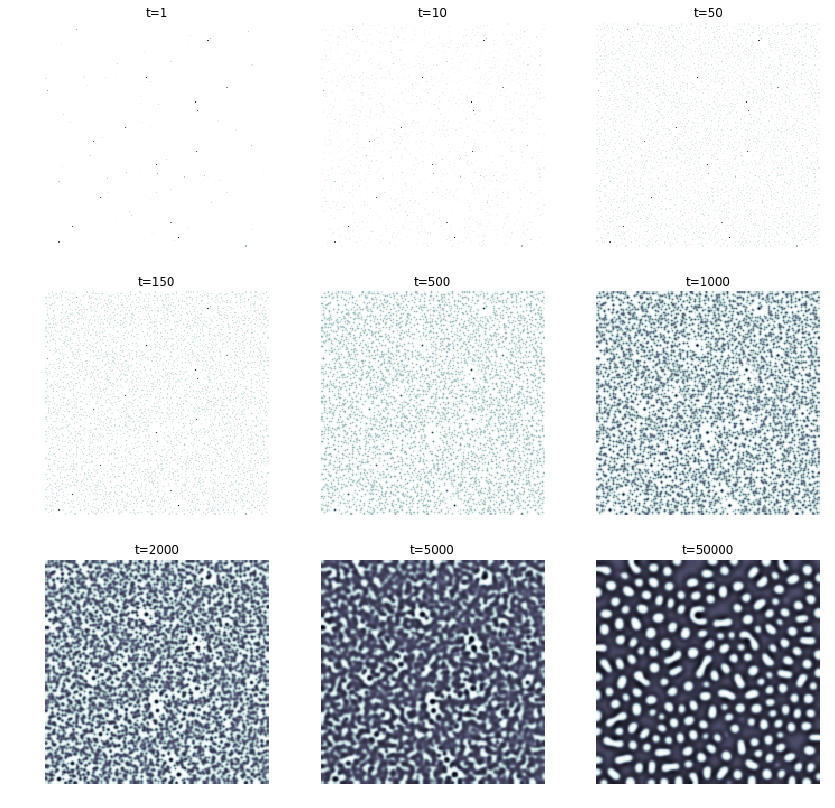

In [680]:
figsize(14,14)
Z = np.random.rand(*Z.shape)*0.02
# Setting model parameters
S=0.05
pp.close('all')
fig,axs = pp.subplots(3,3)
j=0
for i,ax in zip([1,9,40,100,350,500,1000,3000,45000],[n for m in axs for n in m]):
    j=j+i
    run_simulation(n=i,ax=ax,cont=True,title="t="+str(j))
fig

Next we're looking at S=0.5 in progressively larger steps up to 200,000 iterations to see if the system settles and what the steady state looks like.

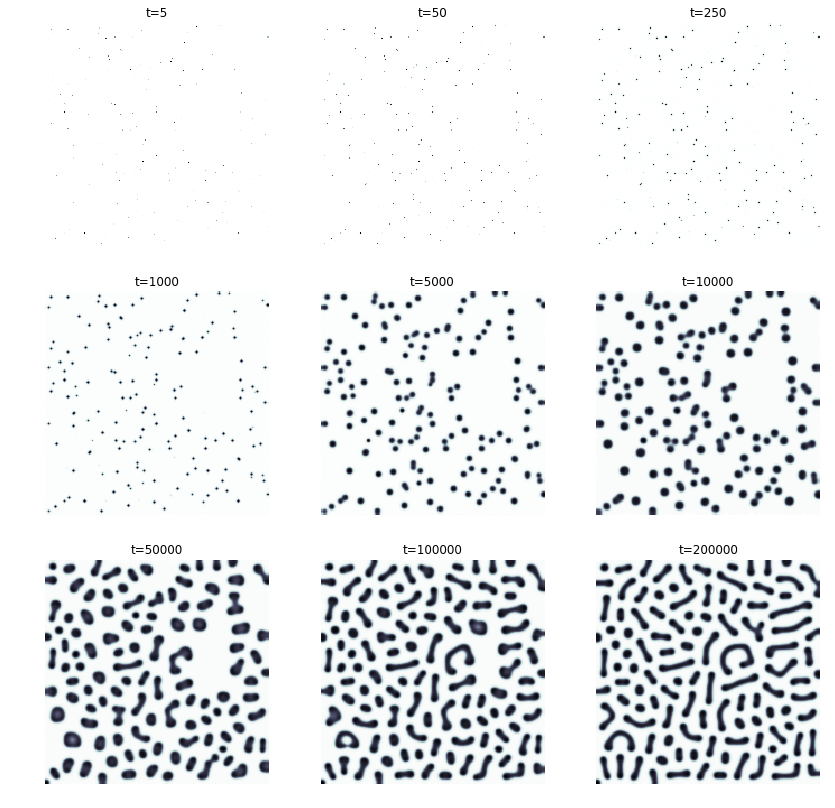

In [616]:
figsize(14,14)
U = np.random.rand(size,size)*0.02
V = np.random.rand(size,size)*0.02
# Setting model parameters
S=0.5
pp.close('all')
fig,axs = pp.subplots(3,3)
j=0
for i,ax in zip([5,45,200,750,4000,5000,40000,50000,100000],[n for m in axs for n in m]):
    j=j+i
    ax.set_title("t="+str(j))
    plot(n=i,ax=ax,cont=True)
fig

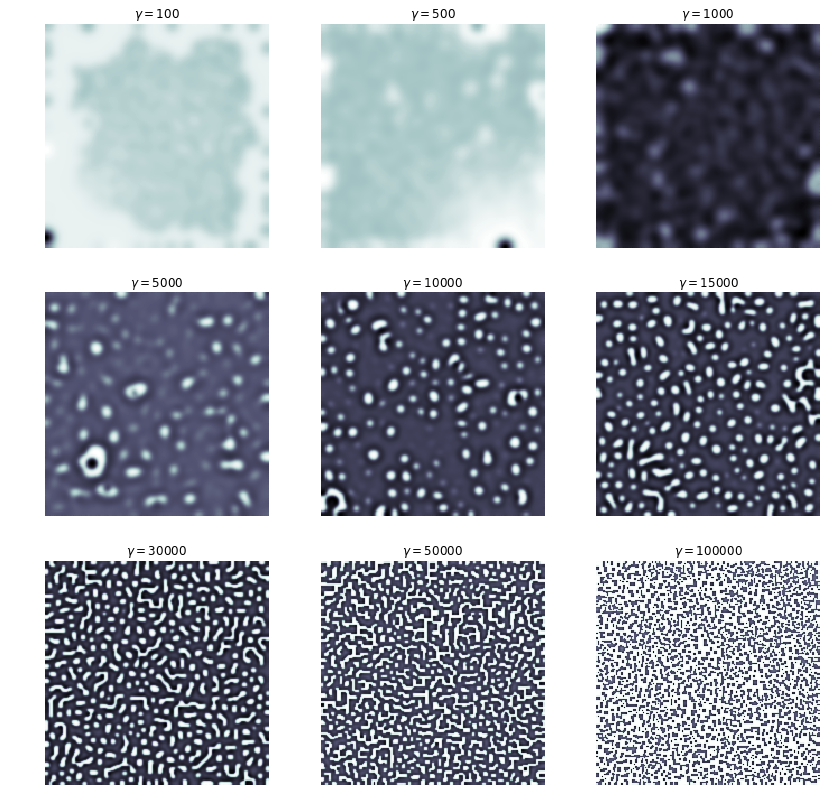

In [689]:
# Setting model parameters
S = 0.
pp.close('all')
fig,axs = pp.subplots(3,3)
for ax,b in zip([n for m in axs for n in m],[100,500,1000,5000,10000,15000,30000,50000,100000]):
    gamma = b
    run_simulation(n=25000,ax=ax,title="$\gamma="+str(gamma)+"$")
fig